### Video Game Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [6]:
len(df['Rank'].unique())

16598

In [8]:
len(df['Publisher'].unique())

579

In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
percentage_of_missed_year=(df['Year'].isnull().sum()/len(df['Year']))*100

In [12]:
percentage_of_missed_year

1.6327268345583803

In [13]:
df=df.dropna()

In [15]:
# checking shape of the dataframe after dropping the values
df.shape

(16291, 11)

In [16]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [22]:
game=df.groupby('Genre')['Global_Sales'].count().head(10)

In [25]:
game=game.sort_values(ascending=False)

In [26]:
game

Genre
Action          3251
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Puzzle           570
Name: Global_Sales, dtype: int64

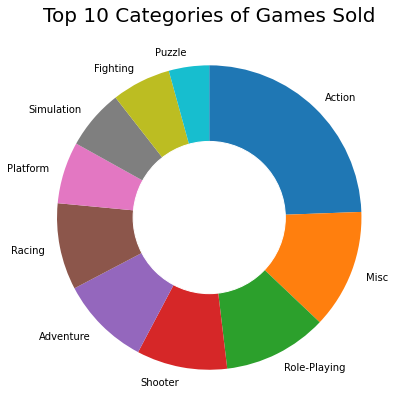

In [33]:
plt.figure(figsize=(7,7))
plt.pie(game,labels=game.index,counterclock=False,startangle=90)
central_circle=plt.Circle((0,0),0.5, color='white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

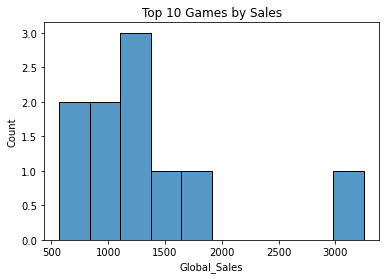

In [31]:
sns.histplot(game,bins=10)
plt.title('Top 10 Games by Sales')
plt.show()

### Corellation between the data

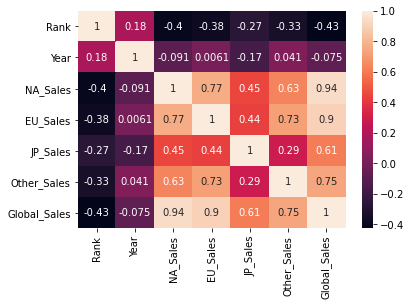

In [34]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Training the Prediction Model

In [35]:
y=df['Global_Sales']
X=df[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:
y_pred

array([0.14030117, 0.30003545, 0.24012219, ..., 0.81975266, 0.08051939,
       0.55985158])

In [41]:
model.score(X_train,y_train)

0.9999893743047102

In [42]:
model.score(X_test,y_test)

0.9999867520241534

In [38]:
from sklearn.metrics import accuracy_score

In [3]:
# My Implementation

In [4]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [5]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [9]:
len(df.Publisher.unique())

579

In [14]:
# not working
publisher=pd.Series(df.Publisher.value_counts()>50)

In [13]:
publisher

Electronic Arts                  True
Activision                       True
Namco Bandai Games               True
Ubisoft                          True
Konami Digital Entertainment     True
                                ...  
Warp                            False
New                             False
Elite                           False
Evolution Games                 False
UIG Entertainment               False
Name: Publisher, Length: 578, dtype: bool

In [17]:
df.isnull().any().sum()

2

In [18]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [19]:
x=df[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y=df.Global_Sales

In [20]:
x.ndim

2

In [21]:
y.ndim

1

In [22]:
x.isnull().sum()

Rank           0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [23]:
x.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,41.49,29.02,3.77,8.46
1,2,29.08,3.58,6.81,0.77
2,3,15.85,12.88,3.79,3.31
3,4,15.75,11.01,3.28,2.96
4,5,11.27,8.89,10.22,1.00


In [25]:
x.Rank.sample(5)

10121    10123
826        828
1897      1899
4636      4638
4950      4952
Name: Rank, dtype: int64

In [26]:
y[0:4]

0    82.74
1    40.24
2    35.82
3    33.00
Name: Global_Sales, dtype: float64